In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_excel('values_final.xlsx')

In [26]:
df.head()

,Company,Ticker,Year,Market Capitalization,Enterprise Value,PE Ratio,PS Ratio,PB Ratio,P/FCF Ratio,P/OCF Ratio,...,Return on Assets (ROA),Return on Capital (ROIC),Earnings Yield,FCF Yield,Dividend Yield,Payout Ratio,Buyback Yield / Dilution,Total Shareholder Return,Debt Issuance,Default
0,Amplify Energy Corp.,AMPY,2023,0.360697,-0.662297,-0.417260,0.540910,0.730905,-0.404631,-0.289807,...,0.0818,0.1386,1.6940,0.4754,0.07195,-0.002298,-0.0159,-0.0159,-0.479340,0
1,Amplify Energy Corp.,AMPY,2022,1.103759,-0.359554,1.500420,0.607515,0.143511,0.341745,1.489474,...,0.0616,0.1556,0.1713,0.0878,0.07195,-0.002298,-0.0103,-0.0103,-0.365843,0
2,Amplify Energy Corp.,AMPY,2021,-0.438445,-0.691438,-1.919267,-0.458159,-2.218301,-0.286528,-0.171188,...,-0.0457,-0.0965,-0.2712,0.2802,0.07195,-0.002298,-0.0092,-0.0092,-0.317201,1
3,Amplify Energy Corp.,AMPY,2020,-0.922136,-0.728674,-0.672252,-0.702376,-1.777756,-0.470511,-0.774167,...,-0.4386,-0.5810,-9.4067,0.7792,0.07630,-0.000082,-0.2836,-0.2073,-0.333415,0
4,Amplify Energy Corp.,AMPY,2019,0.535948,-0.404884,1.430559,0.829530,0.730905,-1.353468,1.588323,...,0.0092,0.0110,-0.1368,-0.1030,0.06760,-0.004514,-0.1740,-0.1063,-0.515010,1


In [27]:
df.columns

Index(['Company', 'Ticker', 'Year', 'Market Capitalization',
       'Enterprise Value', 'PE Ratio', 'PS Ratio', 'PB Ratio', 'P/FCF Ratio',
       'P/OCF Ratio', 'EV/Sales Ratio', 'EV/EBITDA Ratio', 'EV/EBIT Ratio',
       'EV/FCF Ratio', 'Debt / Equity Ratio', 'Debt / EBITDA Ratio',
       'Debt / FCF Ratio', 'Quick Ratio', 'Current Ratio', 'Asset Turnover',
       'Return on Equity (ROE)', 'Return on Assets (ROA)',
       'Return on Capital (ROIC)', 'Earnings Yield', 'FCF Yield',
       'Dividend Yield', 'Payout Ratio', 'Buyback Yield / Dilution',
       'Total Shareholder Return', 'Debt Issuance', 'Default'],
      dtype='object')

In [28]:
# Create test set for the year 2023
test_data = df[df['Year'] == 2023]

# Create training set for years 2013 to 2022
train_data = df[df['Year'] < 2023]

# Define your features (X) and target (y)
# Replace 'Target' with the actual name of your target column
X_train = train_data.drop(['Default'], axis=1)  # Remove the target column for training
y_train = train_data['Default']  # Define target for training

X_test = test_data.drop(['Default'], axis=1)  # Remove the target column for testing
y_test = test_data['Default']  # Define target for testing

# Optionally, check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (500, 30) (500,)
Test set shape: (50, 30) (50,)


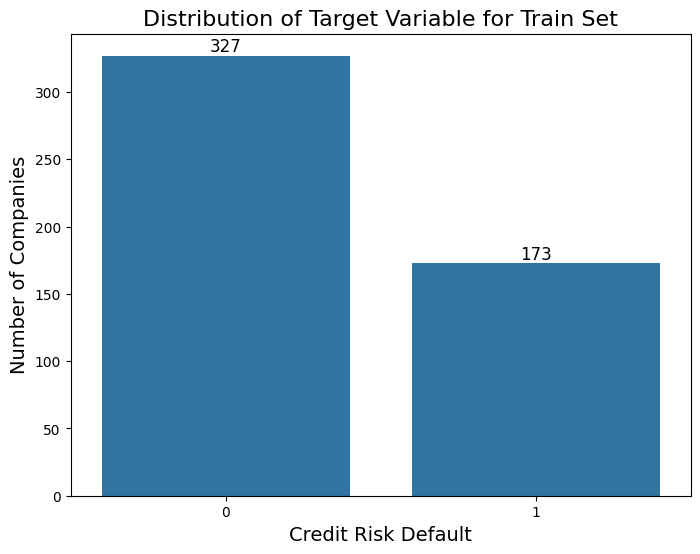

In [47]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = y_train)

# Set axis labels
ax.set_xlabel('Credit Risk Default', fontsize=14)
ax.set_ylabel('Number of Companies', fontsize=14)
ax.set_title('Distribution of Target Variable for Train Set', fontsize=16)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.show()

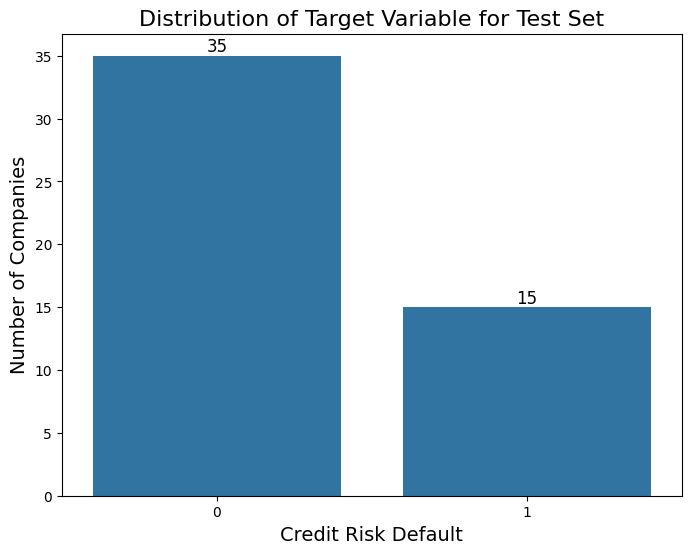

In [48]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = y_test)

# Set axis labels
ax.set_xlabel('Credit Risk Default', fontsize=14)
ax.set_ylabel('Number of Companies', fontsize=14)
ax.set_title('Distribution of Target Variable for Test Set', fontsize=16)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.show()

In [31]:
unique_company_tags = X_train['Company'].unique()
print(unique_company_tags)
print(len(unique_company_tags))

['Amplify Energy Corp.' 'DMC Global Inc.' 'NACCO Industries, Inc.'
 'U.S. Silica Holdings, Inc.' 'Teekay Corporation' 'Safe Bulkers, Inc.'
 'Tsakos Energy Navigation Limited' 'SFL Corporation Ltd.'
 'World Kinect Corporation' 'Navigator Holdings Ltd.' 'Pitney Bowes Inc.'
 'Barrett Business Services, Inc.' 'Viad Corp' 'VSE Corporation'
 'The GEO Group, Inc.' 'ICF International, Inc.' 'MillerKnoll, Inc.'
 'CoreCivic, Inc.' 'TTEC Holdings, Inc.'
 'Matthews International Corporation' 'Weyco Group, Inc.'
 'Winmark Corporation' 'Tile Shop Holdings, Inc.' 'Monro, Inc.'
 'Caleres, Inc.' "Guess', Inc." 'Sonic Automotive, Inc.'
 'The ODP Corporation' 'Hibbett, Inc.' "The Children's Place, Inc."
 'Universal Corporation' 'B&G Foods, Inc.' 'Adecoagro S.A.'
 'Fresh Del Monte Produce Inc.' 'National Beverage Corp.'
 'Flowers Foods, Inc.' 'Sanfilippo (John B.) & Son, Inc'
 'Calavo Growers, Inc.' 'Alico, Inc.' 'Lifeway Foods, Inc.'
 'Universal Logistics Holdings, Inc.' 'Jabil Inc.' 'SkyWest, Inc.'
 'Al

In [32]:
X_train_scaled = X_train.iloc[:, 3:]
X_test_scaled = X_test.iloc[:, 3:]

In [33]:
X_train_scaled.head()

,Market Capitalization,Enterprise Value,PE Ratio,PS Ratio,PB Ratio,P/FCF Ratio,P/OCF Ratio,EV/Sales Ratio,EV/EBITDA Ratio,EV/EBIT Ratio,...,Return on Equity (ROE),Return on Assets (ROA),Return on Capital (ROIC),Earnings Yield,FCF Yield,Dividend Yield,Payout Ratio,Buyback Yield / Dilution,Total Shareholder Return,Debt Issuance
1,1.103759,-0.359554,1.500420,0.607515,0.143511,0.341745,1.489474,-0.480138,-0.207437,0.295514,...,-0.12678,0.0616,0.1556,0.1713,0.0878,0.07195,-0.002298,-0.0103,-0.0103,-0.365843
2,-0.438445,-0.691438,-1.919267,-0.458159,-2.218301,-0.286528,-0.171188,-0.718240,3.146368,-1.497763,...,0.97490,-0.0457,-0.0965,-0.2712,0.2802,0.07195,-0.002298,-0.0092,-0.0092,-0.317201
3,-0.922136,-0.728674,-0.672252,-0.702376,-1.777756,-0.470511,-0.774167,-0.328619,-0.348284,-0.698048,...,-1.24630,-0.4386,-0.5810,-9.4067,0.7792,0.07630,-0.000082,-0.2836,-0.2073,-0.333415
4,0.535948,-0.404884,1.430559,0.829530,0.730905,-1.353468,1.588323,-0.040012,-0.211349,2.667193,...,-2.31740,0.0092,0.0110,-0.1368,-0.1030,0.06760,-0.004514,-0.1740,-0.1063,-0.515010
5,-0.158044,-0.956945,0.473466,0.474305,0.363784,1.848154,-0.373829,-0.833683,-0.454353,-0.384911,...,-0.08270,0.0822,0.0969,0.3150,-0.0332,0.07195,-0.002298,-0.0087,-0.0870,-0.502039


## Grey Correlation Analysis

In [34]:
X_train_scaled = X_train_scaled + 1e-9
entropy = -np.sum(X_train_scaled * np.log(X_train_scaled), axis=0)

c:\Users\soory\Documents\Masters\Projects\Report\credit_risk\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [35]:
print(entropy)

Market Capitalization      -33.182760
Enterprise Value           -21.928444
PE Ratio                   -11.040555
PS Ratio                   -46.165717
PB Ratio                   -39.004949
P/FCF Ratio                -54.421609
P/OCF Ratio                -48.761703
EV/Sales Ratio             -41.312343
EV/EBITDA Ratio            -62.077569
EV/EBIT Ratio              -38.912404
EV/FCF Ratio               -45.119847
Debt / Equity Ratio        -23.145856
Debt / EBITDA Ratio        -60.249206
Debt / FCF Ratio           -60.505717
Quick Ratio                -48.827850
Current Ratio              -38.144831
Asset Turnover             -15.047173
Return on Equity (ROE)      88.390541
Return on Assets (ROA)      63.213769
Return on Capital (ROIC)    77.464514
Earnings Yield              68.327287
FCF Yield                   63.336399
Dividend Yield              47.130219
Payout Ratio                34.313040
Buyback Yield / Dilution    19.238867
Total Shareholder Return    42.340482
Debt Issuanc

In [36]:
weights = entropy / np.sum(entropy)

print("Weights:")
print(weights)
print(weights.shape)

print("Sum of Weights:", np.sum(weights))

Weights:
Market Capitalization       0.141008
Enterprise Value            0.093184
PE Ratio                    0.046916
PS Ratio                    0.196179
PB Ratio                    0.165750
P/FCF Ratio                 0.231262
P/OCF Ratio                 0.207210
EV/Sales Ratio              0.175555
EV/EBITDA Ratio             0.263795
EV/EBIT Ratio               0.165356
EV/FCF Ratio                0.191735
Debt / Equity Ratio         0.098357
Debt / EBITDA Ratio         0.256026
Debt / FCF Ratio            0.257116
Quick Ratio                 0.207491
Current Ratio               0.162095
Asset Turnover              0.063942
Return on Equity (ROE)     -0.375611
Return on Assets (ROA)     -0.268624
Return on Capital (ROIC)   -0.329182
Earnings Yield             -0.290353
FCF Yield                  -0.269145
Dividend Yield             -0.200277
Payout Ratio               -0.145812
Buyback Yield / Dilution   -0.081755
Total Shareholder Return   -0.179924
Debt Issuance               0

In [37]:
weights_expanded = np.expand_dims(weights, axis=(0, 1))
# print(weights_expanded)
abs_difference = np.abs(X_train_scaled.to_numpy()[:, :, np.newaxis] - 
                        X_train_scaled.to_numpy()[:, np.newaxis, :])

# print("Shape of abs_difference:", abs_difference.shape)

grey_correlation_matrix = np.sum(weights_expanded * abs_difference, axis=0) / np.sum(weights)
# print("Grey Correlation Matrix:")
# print(grey_correlation_matrix)
grey_correlation_df = pd.DataFrame(grey_correlation_matrix, index=X_train_scaled.columns, columns=X_train_scaled.columns)
average_correlation = grey_correlation_df.mean(axis=1)
ranked_indicators = average_correlation.sort_values(ascending=False)
print("Ranked Financial Indicators:")
print(ranked_indicators)

Ranked Financial Indicators:
Earnings Yield              40.898158
FCF Yield                   40.887999
Return on Capital (ROIC)    40.822276
Return on Assets (ROA)      40.630051
Return on Equity (ROE)      40.538700
Dividend Yield              39.831771
Total Shareholder Return    39.596388
Buyback Yield / Dilution    38.769304
Payout Ratio                38.036152
Asset Turnover              30.967299
PE Ratio                    26.879006
Debt / Equity Ratio         26.019644
Debt Issuance               24.435816
Current Ratio               23.793030
Quick Ratio                 23.654609
Debt / EBITDA Ratio         22.958168
Debt / FCF Ratio            22.271955
EV/EBIT Ratio               21.637353
EV/FCF Ratio                20.174022
Enterprise Value            19.928121
P/FCF Ratio                 19.544990
Market Capitalization       18.161194
PB Ratio                    17.826360
P/OCF Ratio                 17.482471
EV/EBITDA Ratio             16.814650
EV/Sales Ratio       

## Principal Component Analysis

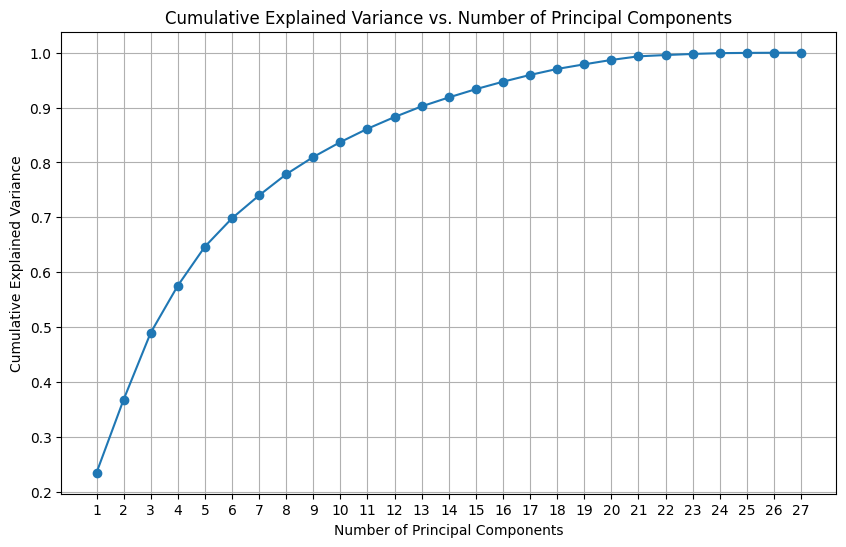

In [38]:
max_components = min(X_train_scaled.shape[1],30)

explained_variances = []
for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.xticks(np.arange(1, max_components + 1))
plt.show()

In [39]:
pca = PCA()

weighted_X_train_scaled = X_train_scaled * weights

pca.fit(weighted_X_train_scaled)

desired_variance_ratio = 0.95  
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= desired_variance_ratio) + 1

print("Number of Principal Components:", num_components)

x_train_pca = pca.transform(weighted_X_train_scaled)[:, :num_components]

weighted_X_test_scaled = X_test_scaled * weights

x_test_pca = pca.transform(weighted_X_test_scaled)[:, :num_components]

Number of Principal Components: 15


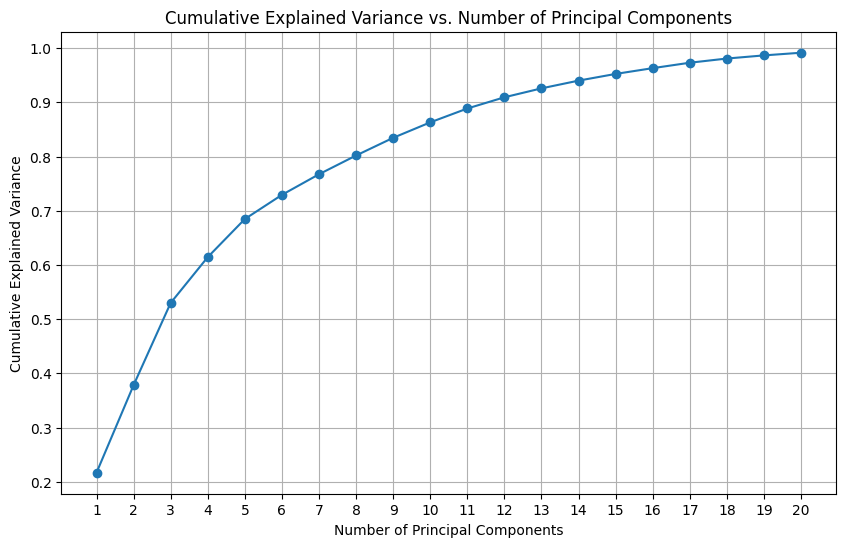

In [40]:
max_components = min(weighted_X_train_scaled.shape[1], 20)

explained_variances = []
for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)
    pca.fit(weighted_X_train_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.xticks(np.arange(1, max_components + 1))
plt.show()

In [41]:
print(x_train_pca)

[[ 0.15766094  0.15435712 -0.18022478 ... -0.04930643 -0.02507038
  -0.06819986]
 [ 0.17671148 -0.36380023  0.79770028 ...  0.05838254 -0.0623466
  -0.09115917]
 [-0.41270023  0.03045887  0.3006334  ...  0.69652998 -0.23582674
   0.07555242]
 ...
 [ 0.07007923  0.10506276  0.01567843 ... -0.05891156  0.04329056
  -0.01047035]
 [-0.01866293  0.14472075  0.10101181 ... -0.09334488  0.04283518
  -0.00422268]
 [ 0.29900299  0.02749409 -0.22638283 ... -0.04582004  0.04604905
  -0.05426009]]


In [42]:
x_train_pca.shape

(500, 15)

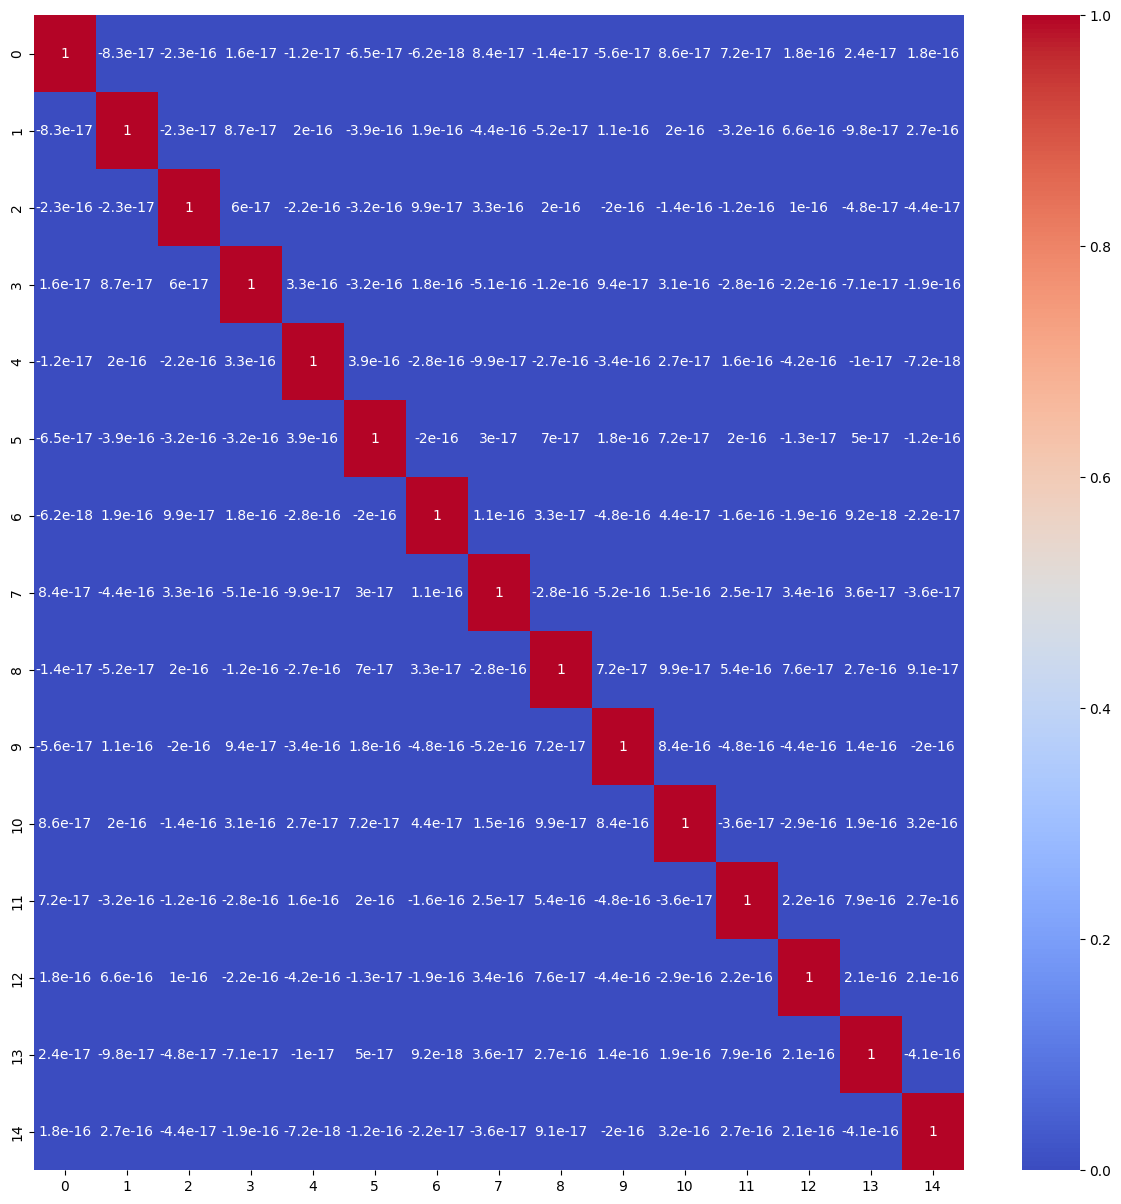

In [43]:
pca_df = pd.DataFrame(x_train_pca)

correlation_matrix = pca_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Linear Discriminant Analysis

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_pca, y_train)

LinearDiscriminantAnalysis()

In [45]:
y_pred = lda.predict(x_test_pca)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7
